In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/amitmishra/Downloads/Datasets/credit-risk/cr_loan2.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### 1 = default, 0 = non-default

In [4]:
pd.crosstab(df['person_home_ownership'], df['loan_status'], values = df['loan_int_rate'] , aggfunc= 'mean').round(2)

loan_status,0,1
person_home_ownership,,
MORTGAGE,10.06,13.43
OTHER,11.41,13.56
OWN,10.75,12.24
RENT,10.75,12.97


In [5]:
pd.crosstab(df['loan_intent'], df['loan_status'], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


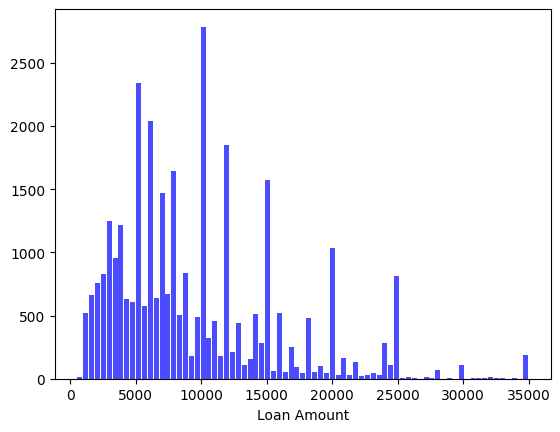

In [6]:
#Visualizaing distribution of loan amounts

plt.hist(df['loan_amnt'], bins = 'auto', color = 'blue', alpha = 0.7, rwidth = 0.85)
plt.xlabel('Loan Amount')
plt.show()

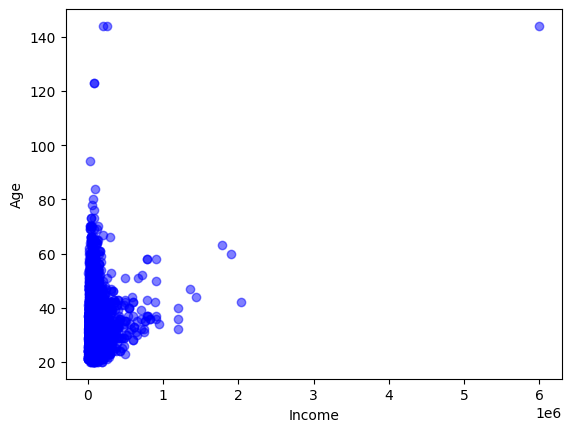

In [7]:
plt.scatter(df['person_income'], df['person_age'], c = 'blue', alpha = 0.5)
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

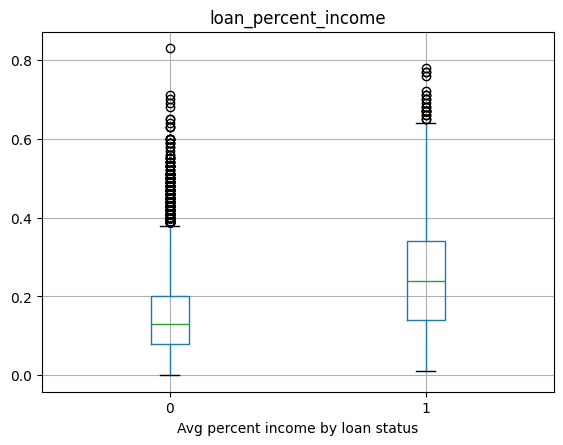

In [10]:
#Box plot of percentage income by loan status

df.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.xlabel('Avg percent income by loan status')
plt.suptitle('')
plt.show()

### The plot clearly shows that defaulting loans (1) have higher loan_percent_income values on average than non-defaulting loans (0). 
### This means people who defaulted were typically using a larger percentage of their income to pay their loans compared to those who didn't default.
#### The median for group 0 (non-default) is around 0.13 (13% of income)
#### The median for group 1 (default) is around 0.23 (23% of income)

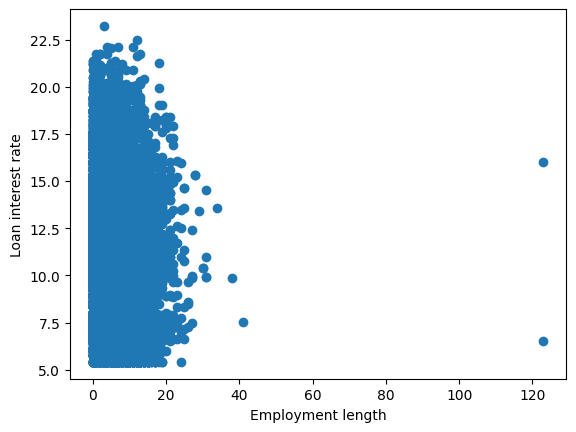

In [17]:
#Detecting and removing outliers

plt.scatter(x = df['person_emp_length'], y= df['loan_int_rate'])
plt.xlabel("Employment length")
plt.ylabel("Loan interest rate")
plt.show()


In [18]:
indices = df[df['person_emp_length'] >=60].index

In [21]:
df.drop(indices, inplace = True)

In [22]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


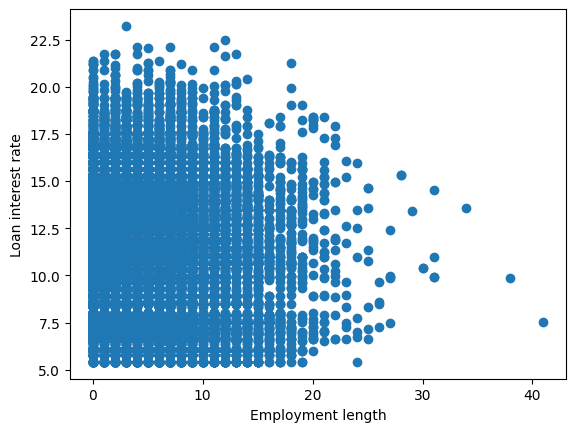

In [23]:
plt.scatter(x = df['person_emp_length'], y= df['loan_int_rate'])
plt.xlabel("Employment length")
plt.ylabel("Loan interest rate")
plt.show()
